In [41]:
from IPython.core.display import display, HTML
from IPython.display import display
import ipywidgets as widgets
from string import Template
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
HTML('<script src="https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.16/d3.min.js"></script>')
HTML('<script src="https://d3js.org/d3.v4.min.js"></script>')

In [42]:
html_template = Template('''
<html>
<head>
<meta charset="utf-8">
<style> $css_text </style></head>
<body>
    <div id="container">
      <p id="headline" class="hed">Cirrus Frontend Visualization</p>
    </div> 
<p id="menu" class="menuchoice">Select graph: <select>
    <option value="val1">Loss</option>
     <option value="val2">Value 2</option>
    <option value="val3">Value 3</option>
     <option value="val4">Value 4</option>
    </select>
<div id="graphic"> </div>
<div class="graph"></div>
<script src="http://d3js.org/d3.v3.min.js"></script>
<script> $js_text_template </script></body></html>
''')

In [43]:
css_text = '''
        body {
            font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
        }

        .line1 {
            fill: none;
            stroke: steelblue;
            stroke-width: 1px;
        }
        
        .graph .axis {
            stroke-width: 1;
        }

        .graph .axis .tick line {
            stroke: black;
        }

        .graph .axis .tick text {
            fill: black;
            font-size: 0.7em;
        }

        .graph .axis .domain {
            fill: none;
            stroke: black;
        }

        .graph .group {
            fill: none;
            stroke: black;
            stroke-width: 1.5;
            
        }
        button {
            margin: 20px 0 0 20px;
        }
'''

In [9]:
js_text_template = '''
d3.select('#headline')
    .style('width',width+'px');

var t = -1;
var n = 40;
var limit = 60 * 1;
var duration = 500;
now = new Date(Date.now() - duration);
secondary = new Date(Date.now());

	var data1 = initialise();  
			
	function initialise()
	{
		var time = -1;
		var arr = [];
		for (var i = 0; i < n; i++)
		{
			var obj = {
				time: ++time,
				value: Math.random()*0.01
			};
			arr.push(obj);
		}	
		t = time;
		return arr;
	}
	
	// push a new element on to the given array
	function updateData(a)
	{
		var obj = {
			time:  t,  
			value: Math.random()*0.01
		};
		a.push(obj);
	}
	
    var margin = {top: 10, right: 10, bottom: 20, left: 40},
        width = 960 - margin.left - margin.right,
        height = 500 - margin.top - margin.bottom;
	 
    var x = d3.scale.linear()
        .domain([0, t])
        .range([0, width]);
	 
    var y = d3.scale.linear()
        .domain([0, 0.01])
        .range([height, 0]);
	 
    var line = d3.svg.line()
		.interpolate("basis")
        .x(function(d, i) { return x(d.time); })
        .y(function(d, i) { return y(d.value); });
		
    var svg = d3.select(".graph").append("svg")
        .attr("width", width + margin.left + margin.right)
        .attr("height", height + margin.top + margin.bottom);

    var g = svg.append("g")
        .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

    var clip = svg.append("svg:clipPath")
        .attr("id", "clip")
        .append("svg:rect")
        .attr("x", 0)
        .attr("y", 0)
        .attr("width", width)
        .attr("height", height);  

	// extra svg to clip the graph and x axis as they transition in and out
    var graph = g.append("svg")
        .attr("width", width)
        .attr("height", height + margin.top + margin.bottom);
	
    var xAxis = d3.svg.axis().scale(x).orient("bottom");
    var axis = graph.append("g")
        .attr("class", "x axis")
        .attr("transform", "translate(0," + height + ")")
        .call(x.axis=xAxis);
        
	 
    g.append("g")
        .attr("class", "y axis")
        .call(d3.svg.axis().scale(y).orient("left"));
	 
	var path1 = graph.append("g")
		.append("path")
		.data([data1])
		.attr("class", "line1");

	tick();
		
    function tick() {

		t++;
        secondary = new Date();
		
		// push
		updateData(data1);

        // update the domains
        // x.domain([t - n + 2 , t]);
        x.domain([0, t]);
		
        // redraw the lines
        path1.select(".line1").attr("d", line).attr("transform", null);
        
        // d3.select('path1').transition().duration(2000).style("stroke-width", "20");
		
        // slide the line left
		path1
			.transition()
			.duration(duration)
            .ease("linear")
			.attr("transform", "translate(" + x(t-n+1) + ")")
            .each('end', tick);
            
		 // slide the x-axis left
        axis.transition()
            .duration(duration)
            .ease("linear")
            .call(xAxis);

        // data1.shift();
    }
    
    tick()
    
'''

In [10]:
# a = df_to_d3(pd.DataFrame(0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5))
# print(a)
a = [0.00125   , 0.00124054, 0.00123172, 0.0012229 , 0.00121133,
       0.0012056 , 0.00119452, 0.00118506, 0.00117789]
# js_text = js_text_template.substitute({'python_data' : json.dumps(a)})
HTML(html_template.substitute({'css_text' : css_text, 'js_text_template': js_text_template}))

<IPython.core.display.Javascript object>


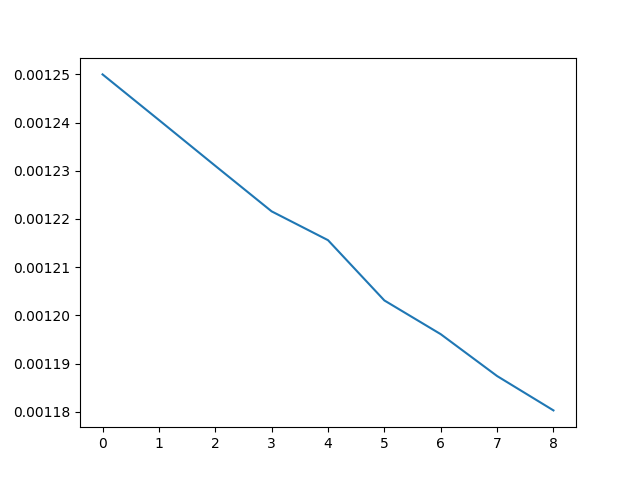

In [51]:
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for z in range(0, 10):
    ax.clear()
    x = np.arange(z)
    y = 0.00025 + 0.001 * np.exp(-x/100.) + stats.gamma(3).rvs(len(x))*(1-np.exp(-x/100))*2e-5
    ax.plot(y)
    fig.canvas.draw()


In [ ]:
def df_to_d3(df):
    data = []
    keys, labels = df.index, df.columns
    for key in keys:
        values = [{'label': l, 'value': df[l][key]} for l in labels]
        data.append({'values': values, 'key': key})
    return data

In [ ]:
y

In [ ]:
'''
,
            target: {
                value: 0,
                color: 'green',
                data: d3.range(limit).map(function() {
                    return 0
                })
            },
            output: {
                value: 0,
                color: 'grey',
                data: d3.range(limit).map(function() {
                    return 0
                })
            }'''

In [ ]:

# js_text_template = '''
# var limit = 60 * 1,
#             duration = 750,
#             now = new Date(Date.now() - duration)

#         var width = 500,
#             height = 200

#         var groups = {
#             current: {
#                 value: 0,
#                 color: 'orange',
#                 data: d3.range(limit).map(function() {
#                     return 0
#                 })
#             },
#             target: {
#                 value: 0,
#                 color: 'green',
#                 data: d3.range(limit).map(function() {
#                     return 0
#                 })
#             },
#             output: {
#                 value: 0,
#                 color: 'grey',
#                 data: d3.range(limit).map(function() {
#                     return 0
#                 })
#             }
#         }

#         var x = d3.time.scale()
#             .domain([now - (limit - 2), now - duration])
#             .range([0, width])

#         var y = d3.scale.linear()
#             .domain([0, 100])
#             .range([height, 0])

#         var line = d3.svg.line()
#             .interpolate('basis')
#             .x(function(d, i) {
#                 return x(now - (limit - 1 - i) * duration)
#             })
#             .y(function(d) {
#                 return y(d)
#             })

#         var svg = d3.select('.graph').append('svg')
#             .attr('class', 'chart')
#             .attr('width', width)
#             .attr('height', height + 50)

#         var axis = svg.append('g')
#             .attr('class', 'x axis')
#             .attr('transform', 'translate(0,' + height + ')')
#             .call(x.axis = d3.svg.axis().scale(x).orient('bottom'))

#         var paths = svg.append('g')

#         for (var name in groups) {
#             var group = groups[name]
#             group.path = paths.append('path')
#                 .data([group.data])
#                 .attr('class', name + ' group')
#                 .style('stroke', group.color)
#         }

#         function tick() {
#         now = new Date()

#             // Add new values
#             for (var name in groups) {
#                 var group = groups[name]
#                 //group.data.push(group.value) // Real values arrive at irregular intervals
#                 group.data.push(20 + Math.random() * 100)
#                 group.path.attr('d', line)
#             }

#             // Shift domain
#             x.domain([now - (limit - 2) * duration, now - duration])

#             // Slide x-axis left
#             axis.transition()
#                 .duration(duration)
#                 .ease('linear')
#                 .call(x.axis)

#             // Slide paths left
#             paths.attr('transform', null)
#                 .transition()
#                 .duration(duration)
#                 .ease('linear')
#                 .attr('transform', 'translate(' + x(now - (limit - 1) * duration) + ')')
#                 .each('end', tick)

#             // Remove oldest data point from each group
#             for (var name in groups) {
#                 var group = groups[name]
#                 group.data.shift()
#             }
#         }

#         tick()
# '''

print("Hi")